In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
print(os.listdir())

In [1]:
import numpy as np

array = [[1,2,3],[4,5,6]]
first_array = np.array(array) # 2*3 array
print('array type : {}'.format(type(first_array)))
print('array shape : {}'.format(np.shape(first_array)))
print(first_array)


array type : <class 'numpy.ndarray'>
array shape : (2, 3)
[[1 2 3]
 [4 5 6]]


In [2]:
import torch

tensor = torch.Tensor(array)
print('array type : {}'.format(tensor.type))
print('array shape : {}'.format(tensor.shape))
print(tensor)

array type : <built-in method type of Tensor object at 0x000001997C848680>
array shape : torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [3]:
print('numpy {}\n'.format(np.ones((2,3))))

print(torch.ones((2,3)))

numpy [[1. 1. 1.]
 [1. 1. 1.]]

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [4]:
print('numpy {}\n'.format(np.random.rand(2,3)))

print(torch.rand(2,3))

numpy [[0.4270184  0.52263319 0.11397152]
 [0.08976703 0.03399129 0.05020707]]

tensor([[0.8673, 0.9763, 0.2061],
        [0.6375, 0.1360, 0.8149]])


In [6]:
array = np.random.rand(2,2)
print('{} {}\n'.format(type(array),array))

from_numpy_to_tensor = torch.from_numpy(array)
print('{}\n'.format(from_numpy_to_tensor))

tensor = from_numpy_to_tensor
from_tensor_to_numpy = tensor.numpy()
print('{} {}\n'.format(type(from_tensor_to_numpy),from_tensor_to_numpy))

<class 'numpy.ndarray'> [[0.73055044 0.52308135]
 [0.82326249 0.86493493]]

tensor([[0.7306, 0.5231],
        [0.8233, 0.8649]], dtype=torch.float64)

<class 'numpy.ndarray'> [[0.73055044 0.52308135]
 [0.82326249 0.86493493]]



Resize: view()
a and b are tensor.
Addition: torch.add(a,b) = a + b
Subtraction: a.sub(b) = a - b
Element wise multiplication: torch.mul(a,b) = a * b
Element wise division: torch.div(a,b) = a / b
Mean: a.mean()
Standart Deviation (std): a.std()

In [7]:
# create tensor
tensor = torch.ones(3,3)
print('\n', tensor)

# resize
print('{}{}\n'.format(tensor.view(9).shape, tensor.view(9)))

# addition 더하기
print('addition: {}\n'.format(torch.add(tensor,tensor)))
# 1+1이 되어 2로 채워짐

# subtraction 빼기
print('subtraction : {}\n'.format(tensor.sub(tensor)))
# 1-1이 되어 0으로 채워짐

# element wise mutiplication 곱하기
print('element wise mutiplication: {}\n'.format(torch.mul(tensor,tensor)))

# Element wise division 나누기
print("Element wise division: {}\n".format(torch.div(tensor,tensor)))

# mean
tensor = torch.Tensor([1,2,3,4,5])
print('mean : {}'.format(tensor.mean()))

# Standart deviation (std)
print("std: {}".format(tensor.std()))


 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
torch.Size([9])tensor([1., 1., 1., 1., 1., 1., 1., 1., 1.])

addition: tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

subtraction : tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

element wise mutiplication: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Element wise division: tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

mean : 3.0
std: 1.5811388492584229


In [10]:
from torch.autograd import Variable

var = Variable(torch.ones(3), requires_grad = True)
var

tensor([1., 1., 1.], requires_grad=True)

In [13]:
array = [2,4]
tensor = torch.Tensor(array)
x = Variable(tensor,requires_grad = True)
y = x**2
print('y = ', y)

o = (1/2)*sum(y)
print('o = ',o)

o.backward() # 기울기 계산 -> 미분
print('gradients : ', x.grad)

y =  tensor([ 4., 16.], grad_fn=<PowBackward0>)
o =  tensor(10., grad_fn=<MulBackward0>)
gradients :  tensor([2., 4.])


Linear Regression

car_price_np.shape: (7,)
car_price_np: [[3.]
 [4.]
 [5.]
 [6.]
 [7.]
 [8.]
 [9.]]
car_price_tensor: tensor([[3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])


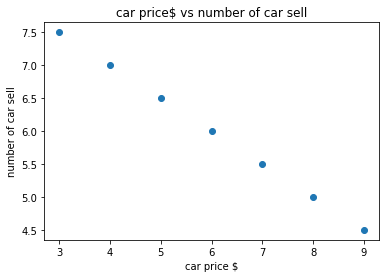

In [19]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array, dtype=np.float32)
print('car_price_np.shape:',car_price_np.shape) 
# float32와 64의 차이는? 64가 숫자를 더 정확하게 표현+용량 커짐(큰 차이는 안남)
car_price_np = car_price_np.reshape(-1,1)
print('car_price_np:', car_price_np)
car_price_tensor = Variable(torch.from_numpy(car_price_np))
print('car_price_tensor:', car_price_tensor)

number_of_car_sell_array = [7.5,7,6.5,6.0,5.5,5.0,4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

import matplotlib.pyplot as plt
plt.scatter(car_prices_array, number_of_car_sell_array)
plt.xlabel('car price $')
plt.ylabel('number of car sell')
plt.title('car price$ vs number of car sell')
plt.show()



Steps of Linear Regression
* create LinearRegression class
* define model from this LinearRegression class
* MSE: Mean squared error
* Optimization (SGD:stochastic gradient descent)
* Backpropagation
* Prediction

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import warnings
warnings.filterwarnings('ignore')

class LinearRegression(nn.Module):
    def __init__(self, input_size,output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)
    def forward(self,x):
        return self.linear(x)

input_dim = 1
output_dim = 1
model = LinearRegression(input_dim, output_dim)

# MSE
mse = nn.MSELoss()

# optimization
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

# train model
loss_list = []
iteration_number = 1001 #반복 숫자 = epoch
for iteration in range(iteration_number):
    # optimization
    optimizer.zero_grad()
    # 갱신되는 loss값을 누적되지 않도록 만들어주는 것
    # torch는 tensor와 다르게 loss가 누적된다.

    # Forward to get output
    results = model(car_price_tensor)
